In [1]:
import pandas as pd
import glob
import os
import numpy as np
import pickle
import statistics
import community
import matplotlib as mlp
# mlp.use("Qt5Agg")
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

import analysis as an
import pandas as pd
import statsmodels as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

# from visbrain.objects import BrainObj, ColorbarObj, SceneObj, SourceObj
# from visbrain.io import download_file, read_stc

# from nilearn.connectome import ConnectivityMeasure

# from nilearn import plotting
#plt.matshow(rwd_mean_correlation_matrix,cmap='hot')

import numpy as np
import seaborn as sns

from scipy import stats as spy_stats
import scipy
import pprint as pp

In [7]:
basepath='/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/'

latest_file2=an.find_latest(os.path.join(basepath,'tmp'),'5_*')
summary_dict=an.onetoughjar(latest_file2)
summary_dict=summary_dict['NR']

/Users/gracer/Google Drive/HCP/HCP_graph/1200/datasets/tmp/5_summary_dict_07-31-2020_05-51-27


In [8]:
for k,v in summary_dict.items():
    # community.induced_graph(partition dictionary, graph)
     comm_graph = community.induced_graph(v['modules']['partition'], v['graphs'])
     v.update(comm_graph = comm_graph)


In [10]:
edges = {}

for group, stuff in summary_dict.items():
    print(group)
    _df = nx.to_pandas_edgelist(stuff['comm_graph'])
#     _df[(_df['source'] != _df['target']), 'weight'] == 0
    _df.loc[(_df['source'] == _df['target']), 'weight'] = 0

    _df['group']=group
    edges[group]=_df

edge_df=pd.concat(list(edges.values()))

no
ov
ob


In [11]:
def zscore(col):
    col_z = (col - col.mean())/col.std(ddof=0)
    return(col_z)

In [13]:
edge_df['z_weight']=zscore(edge_df['weight'])

08-07-2020_12-50-25 NumExpr defaulting to 4 threads. 


In [14]:
for k,v in summary_dict.items():
    test=edge_df[edge_df['group']==k]
    keyz = list(zip(test['source'],test['target']))
    values=test['z_weight']
    up_dict={}
    for i in range(len(keyz)):
        up_dict[keyz[i]]={'z_edge':values[i]}
    nx.set_edge_attributes(v['comm_graph'], up_dict)


In [24]:
aes_dict

{'no': {'general': {'plot_size': (80, 50)},
  'nodes': {'color': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
   'colormap': ('Set3', 9),
   'max': 8,
   'min': 0,
   'font_size': 25,
   'font_family': 'sans-serif',
   'font_weight': 'Bold',
   'node_size': 10},
  'edges': {'colormap': <matplotlib.colors.LinearSegmentedColormap at 0xa191cca20>,
   'width mod': 1,
   'min': -4.543433482991625,
   'max': 1.239879627465514}},
 'ov': {'general': {'plot_size': (80, 50)},
  'nodes': {'color': array([0, 1, 2, 3, 4, 5, 6, 7]),
   'colormap': ('Set3', 8),
   'max': 7,
   'min': 0,
   'font_size': 25,
   'font_family': 'sans-serif',
   'font_weight': 'Bold',
   'node_size': 10},
  'edges': {'colormap': <matplotlib.colors.LinearSegmentedColormap at 0xa191cca20>,
   'width mod': 1,
   'min': -6.171075401676251,
   'max': 0.6687580298537137}},
 'ob': {'general': {'plot_size': (80, 50)},
  'nodes': {'color': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
   'colormap': ('Set3', 9),
   'max': 8,
   'min': 0,
   'font_si

In [109]:
def aesthetics(graph,node_size,font_size, font_family, font_weight, edge_att, plot_size, mod):
    aes={'general':{},
         'nodes':{},
         'edges':{}}
    # nodes
    color = np.array(list(graph.nodes))
    color = np.array(color)
    n_color=len(list(set(color)))
    print(n_color)
    aes['nodes']['color'] = color
    aes['nodes']['colormap'] = ['Set3', n_color]
    aes['nodes']['n_color'] = n_color
    aes['nodes']['max'] = float(color.max())
    aes['nodes']['min'] = float(color.min())
    aes['nodes']['font_size'] = int(font_size)
    aes['nodes']['font_family'] = font_family
    aes['nodes']['font_weight'] = font_weight
    aes['nodes']['node_size'] = int(node_size)
    #edges
    aes['edges']['colormap'] = plt.cm.gist_rainbow
    edges,weights = zip(*nx.get_edge_attributes(G,edge_att).items())
    weights=np.array(weights)
    aes['edges']['width mod'] = mod
    aes['edges']['min'] = weights.min()
    aes['edges']['max'] = weights.max()
    # General 
    aes['general']['plot_size']=plot_size #tuple 80,50
    return(aes)

In [110]:
aes_dict['no']['nodes']


{'color': array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 'colormap': ['Set3', 9],
 'n_color': 9,
 'max': 8,
 'min': 0,
 'font_size': 100,
 'font_family': 'sans-serif',
 'font_weight': 'Bold',
 'node_size': 15000}

In [95]:
aes_dict={'no':{},
          'ov':{},
          'ob':{}}
for group, stuff in summary_dict.items():
    print(group)
    G=stuff['comm_graph']
    aes_dict[group]=aesthetics(G,15000,100, 'sans-serif', 'Bold', 'z_edge', (80,50), 1)

no
9
ov
8
ob
9


9
9
[0.44444444 1.33333333 2.22222222 3.11111111 4.         4.88888889
 5.77777778 6.66666667 7.55555556]


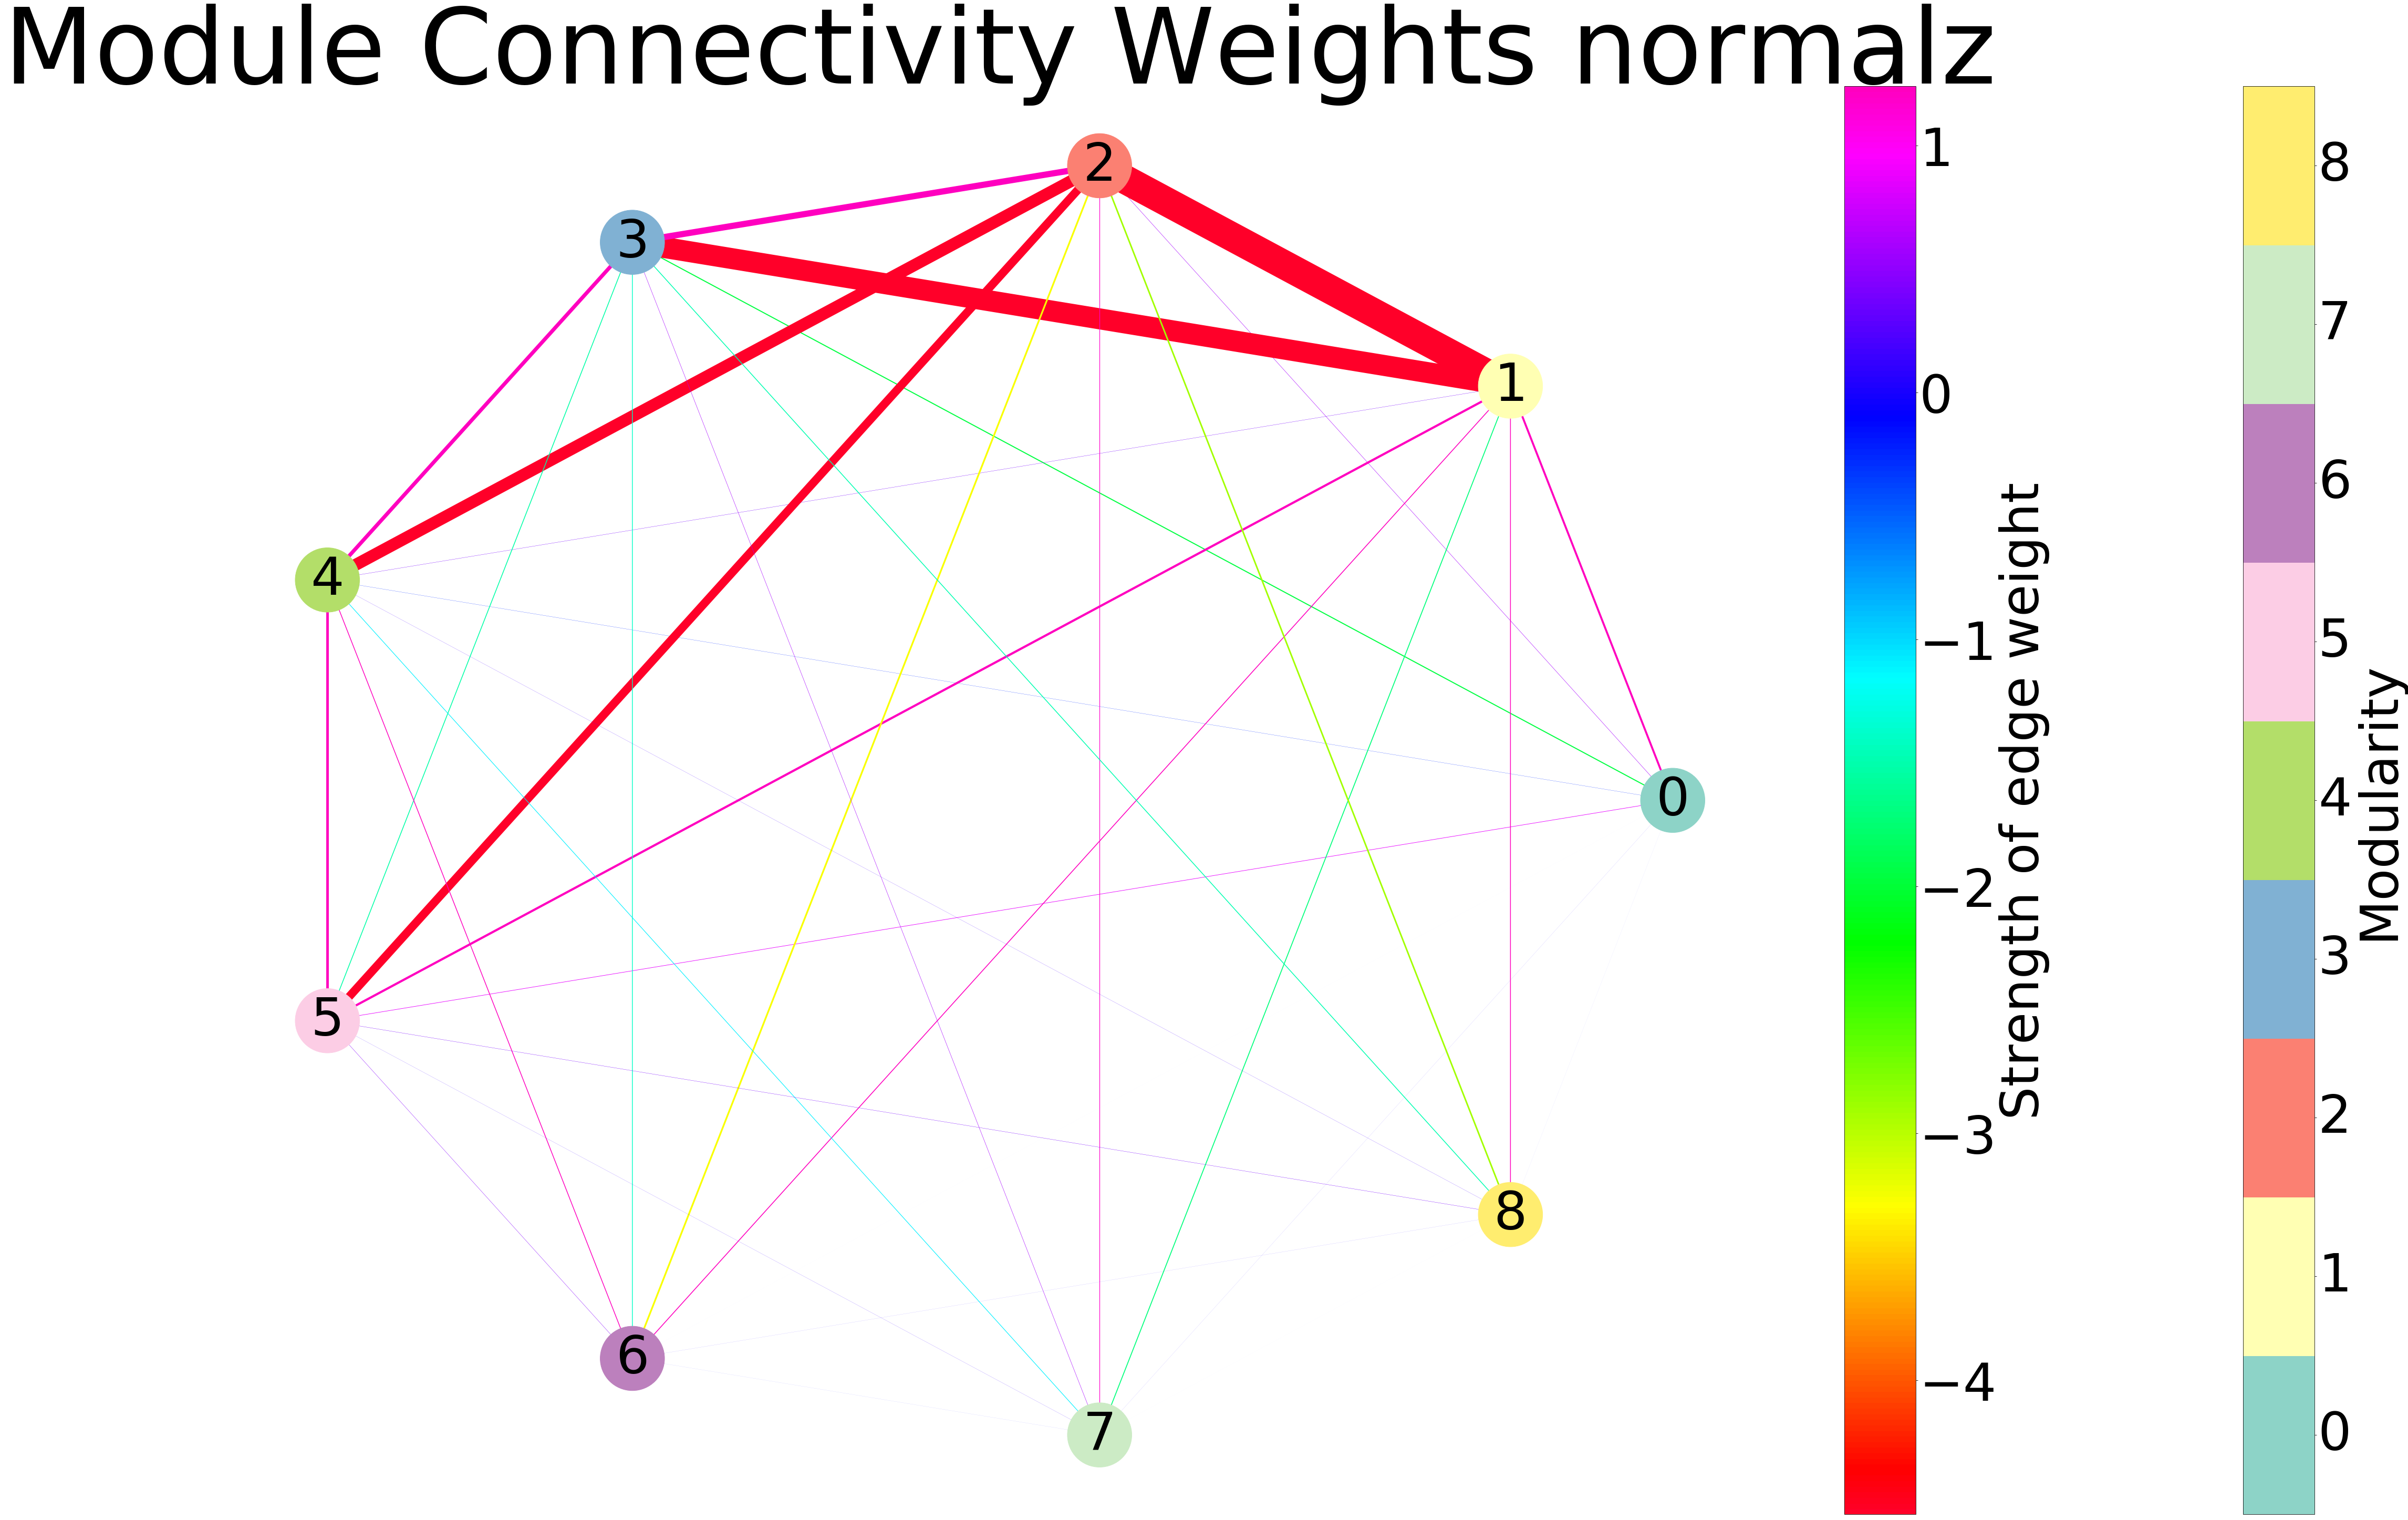

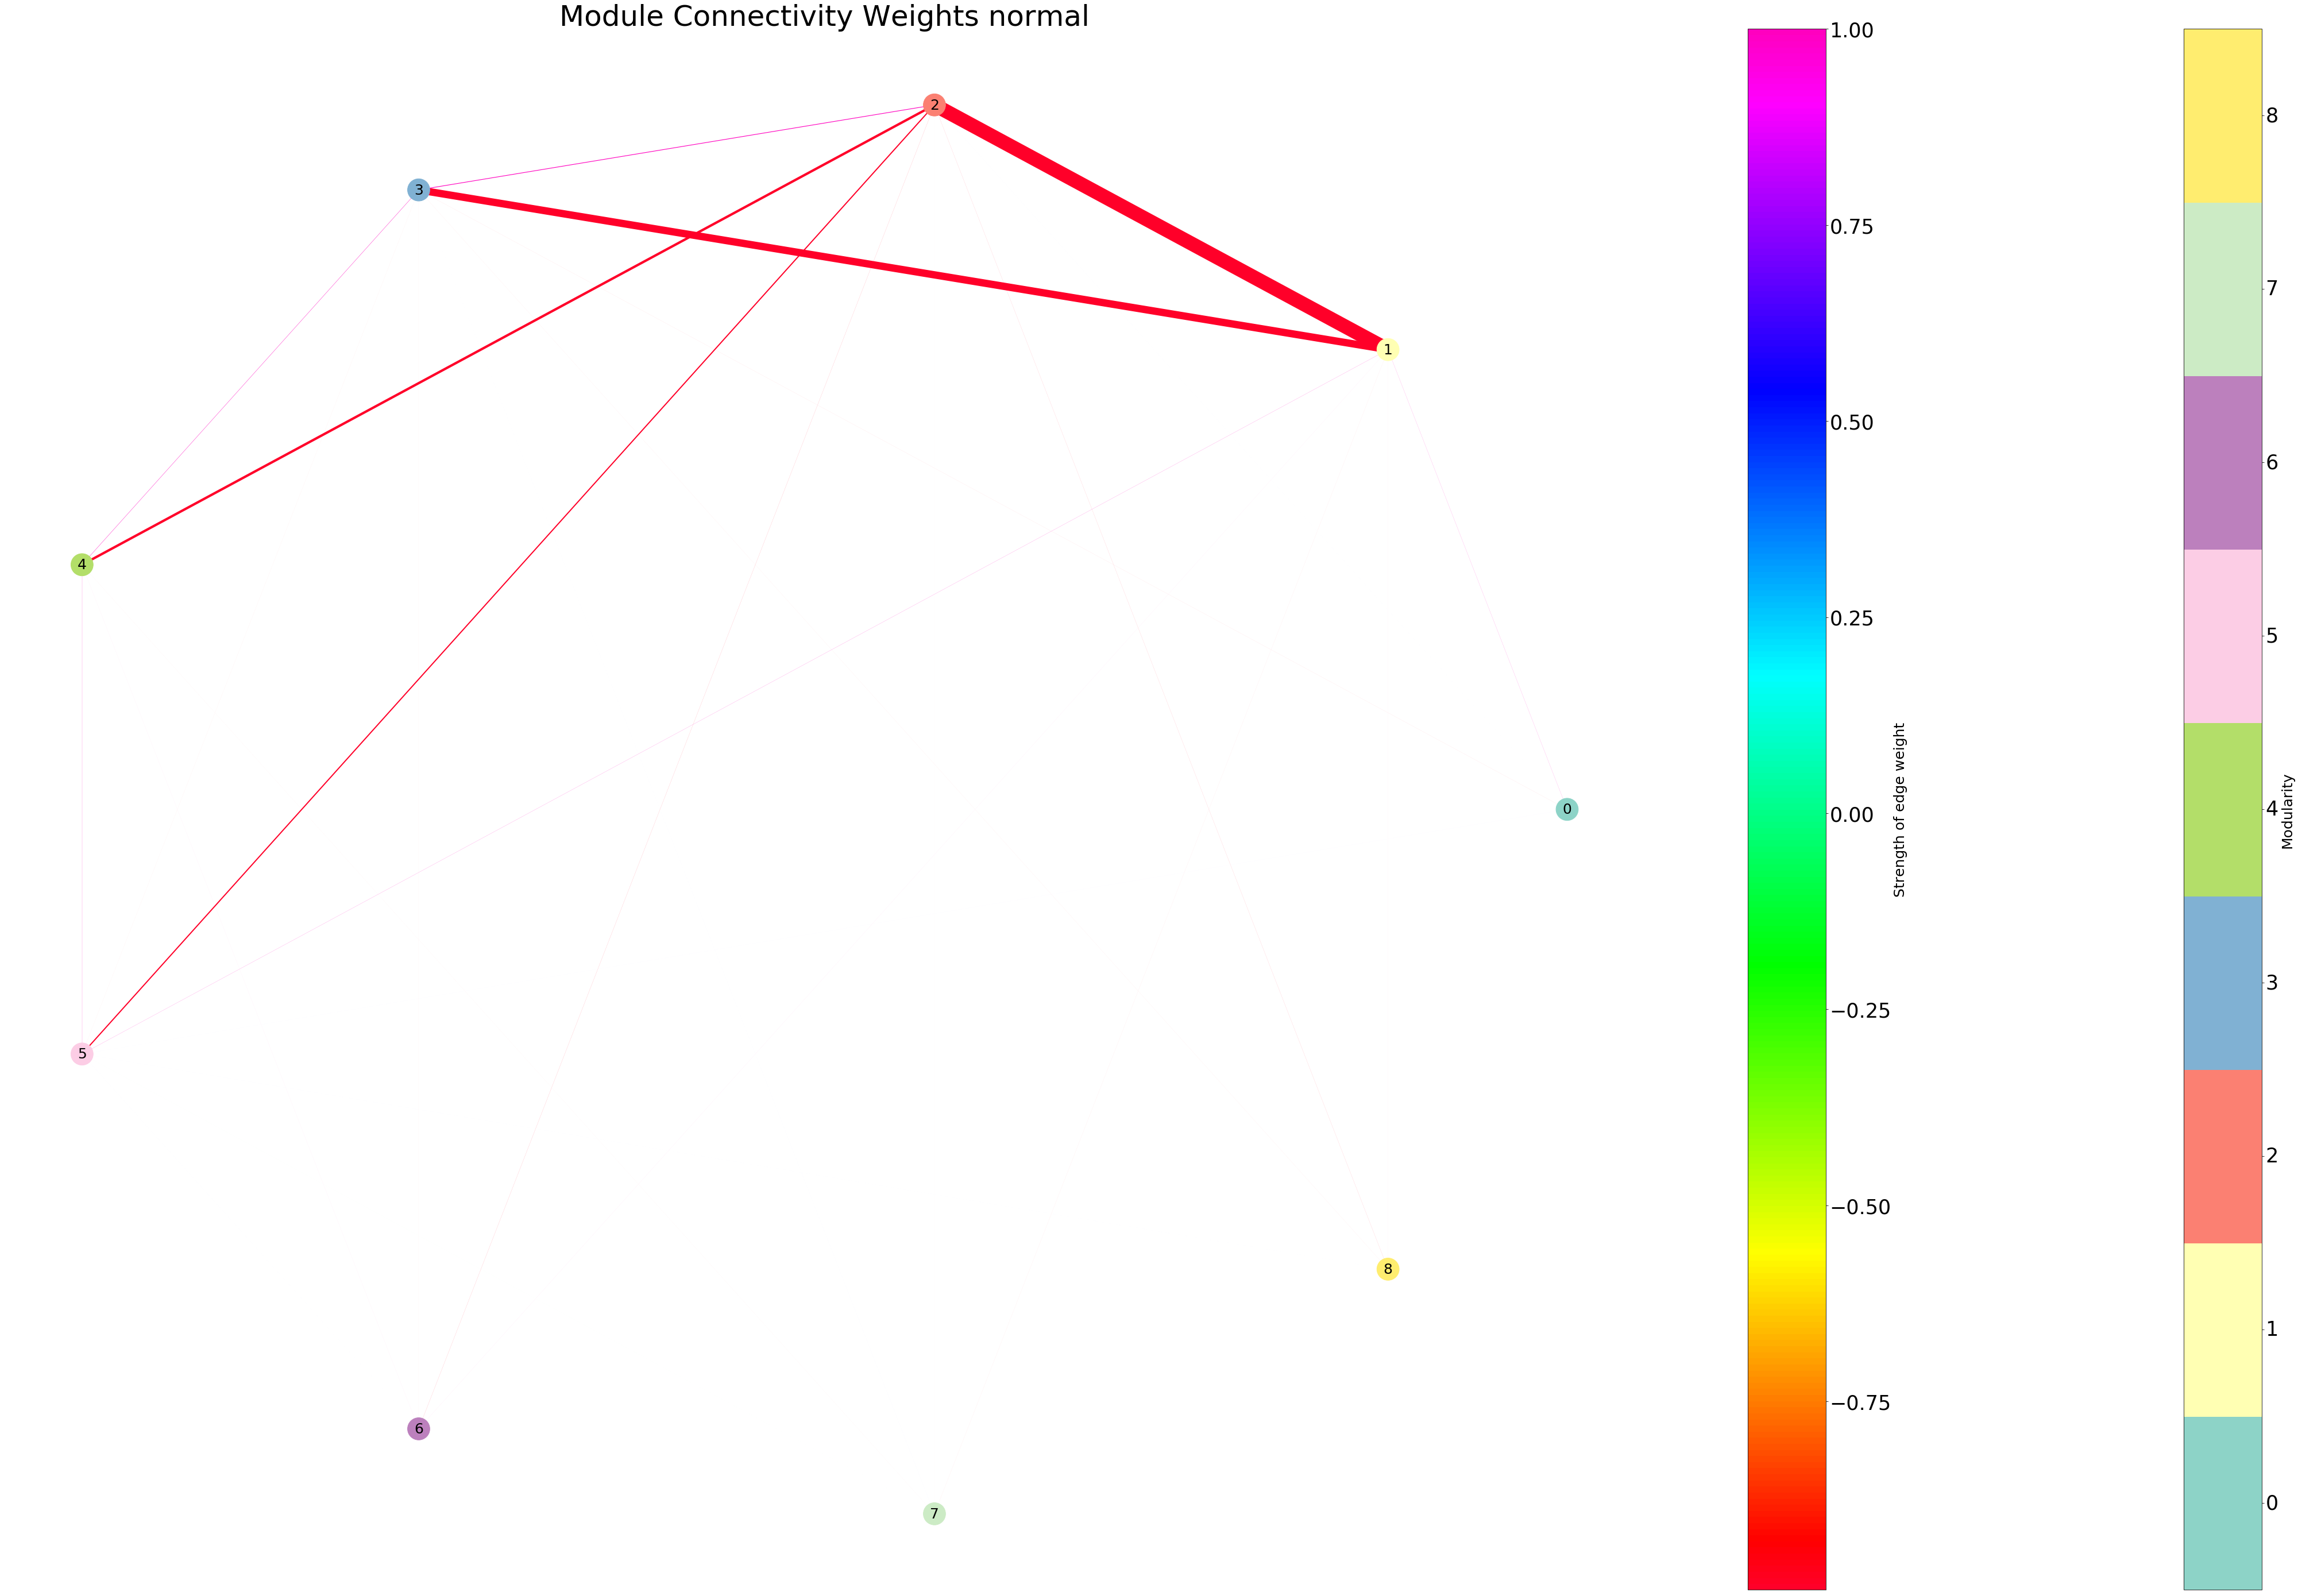

In [114]:
G=summary_dict['no']['comm_graph']
aes=aes_dict['no']
%matplotlib inline

module_fig(G, 'normalz', basepath, aes)
an.module_fig(G,'normal',basepath)

In [113]:
def module_fig(G, Type, basepath, aes):
    edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
    #nodes, size = zip(*nx.get_node_attributes(G,'clustering').items())

    positions=nx.circular_layout(G)
    plt.figure(figsize= aes['general']['plot_size'])
    ### NODES ####
    print(len(G.nodes()))
    y=nx.draw_networkx_nodes(
        G,positions,
        node_color = aes['nodes']['color'],
        node_size = aes['nodes']['node_size'],
        alpha=1.0,
        cmap= plt.get_cmap('Set3', aes['nodes']['n_color']),
        vmin=aes['nodes']['min'],
        vmax=aes['nodes']['max'])

    #Styling for node labels
    nx.draw_networkx_labels(G, 
                            positions, 
                            font_size = aes['nodes']['font_size'],
                            font_family= aes['nodes']['font_family'], 
                            fontweight = aes['nodes']['font_weight'])
    #Node color bar stuff
    n_color = aes['nodes']['n_color']
    print(n_color)
    node_bar=plt.colorbar(y, label='Module value')
    tick_locs = (np.arange(n_color) + 0.5)*(n_color-1)/n_color
    print(tick_locs)
    node_bar.set_ticks(tick_locs)

    # set tick labels (as before)
    node_bar.set_ticklabels(np.arange(n_color))
    node_bar.set_label('Modularity', fontsize =  aes['nodes']['font_size'])
    
    ## EDGES ##
    x=nx.draw_networkx_edges(G, 
                             positions,
                             edge_list=edges,
                             style='solid',
                             width = weights*aes['edges']['width mod'],
                             edge_color = weights,
                             edge_vmin=aes['edges']['min'],
                             edge_vmax=aes['edges']['max'],
                             edge_cmap= aes['edges']['colormap'])
    # Edge color bar stuff
    sm = plt.cm.ScalarMappable(cmap=aes['edges']['colormap'], 
                               norm=plt.Normalize(vmin = aes['edges']['min'], vmax=aes['edges']['max']))
    sm._A = []
    edge_bar=plt.colorbar(sm)

    for l in edge_bar.ax.yaxis.get_ticklabels():
        l.set_size(aes['nodes']['font_size'])
    for l in node_bar.ax.yaxis.get_ticklabels():
        l.set_size(aes['nodes']['font_size'])
        l.set_verticalalignment('center')

    edge_bar.set_label('Strength of edge weight', fontsize = aes['nodes']['font_size'])
    # Title things
    plt.title("Module Connectivity Weights %s"%Type, fontsize = aes['nodes']['font_size']*2)
    plt.axis('off')
    basepath= os.path.join(basepath,'images')
    plt.savefig(os.path.join(basepath,"modularity_%s.png"%(Type)), format="PNG")
    plt.show()